In [5]:
from random import randint
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import *
plt.rcParams['figure.figsize'] = 11, 8
mpl.rcParams.update({'font.size': 15})

In [6]:
def coins(Matrix):
    if Matrix == "H":
        coin = array([[1/sqrt(2) , 1/sqrt(2)],[1/sqrt(2) , -1/sqrt(2)]])
    elif Matrix == "X":
        coin = array([0,1],[1,0])
    return coin

def init_state(N,Pos,Amp,CoinState):
    initstate = zeros((N,1))
    for Node in range(0,Pos.size):
        initstate[Pos[Node],0] = Amp[Node]
    g = kron(CoinState,initstate)
    return g

def init_cond(init,state0,state1):
    if init == "0":
        psi0 = array([[1],[0]])
    if init == "1":
        psi0 = array([[0],[1]])
    if init == "01":
        psi0 = array([[1/sqrt(2)],[(-1*1j)/sqrt(2)]])
    return psi0

def walk_op(N,state0,state1):
    c00= outer(state0,state0)
    c01= outer(state0,state1)
    c10= outer(state1,state0)
    c11= outer(state1,state1)
    ShiftPlus = roll(eye(N),1,axis=0)
    ShiftMinus = roll(eye(N),-1,axis=0)
    Shift = kron(c00,ShiftPlus) + kron(c11,ShiftMinus) 
    return Shift

def CU_op(coin, shift,N):
    U = shift.dot(kron(coin,eye(N)))
    return U

def final_state(U,psi0,steps):
    for t in range(0,steps):
        psi0=U.dot(psi0)
    return psi0

def prob_vec(psiN,N):
    probs = zeros((N,1))
    for x in range(N):
        probs[x]=psiN[x]*conjugate(psiN[x]) + psiN[N+x]*conjugate(psiN[N+x]) #duvida aqui
    return probs

def cqwalk(N,Steps,state0,state1,initcond):
    P = int((N+1)/2)
    Coin = coins("H")
    shift= walk_op(N,state0,state1)
    U = CU_op(Coin,shift,N)
    coinstate = initcond
    amp = array([1])
    psi0 = init_state(N,array([P]),amp,coinstate)
    psiN = final_state(U,psi0,Steps)
    probvec = prob_vec(psiN,N)
    return probvec

def multipleCoined(n,steps,state0,state1,initcond):
    probvec = []
    for step in steps:
        P = int((n+1)/2)
        Coin = coins("H")
        shift= walk_op(N,state0,state1)
        U = CU_op(Coin,shift,n)
        coinstate = initcond
        amp = array([1])
        psi0 = init_state(n,array([P]),amp,coinstate)
        psiN = final_state(U,psi0,step)
        probvec.append(prob_vec(psiN,n))
    return probvec

def plotMultQW(N,probT,init,steps,configVec):
    x = arange(-N/2,N/2)
    stepsName=""
    for walk,config,step in zip(probT,configVec,steps):
        plt.plot(x,walk,color=config[0],linestyle=config[1],label="Steps=%s"%step)
        stepsName+=str(step)
    plt.legend()
    plt.xlabel("Graph Node")
    plt.ylabel("Probability")


In [8]:
state0 = array([1,0])
state1 = array([0,1])

init = '01'
initcond = init_cond(init,state0,state1)

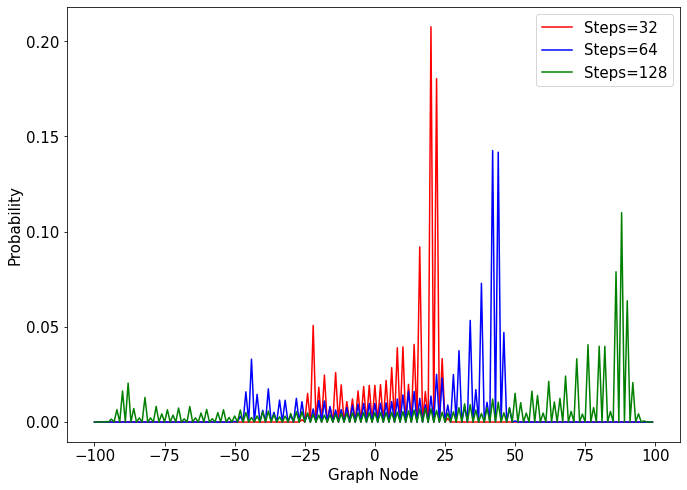

In [19]:
init2 = '0'
initcond2 = init_cond(init2,state0,state1)
N = 200
colors = ['r','b','g','k']
lines = ['-','-','-','-']
configVec = zip(colors,lines)

stepMult = [32,64,128]
multQWpsi0 = multipleCoined(N,stepMult,state0,state1,initcond2)
plotMultQW(N,multQWpsi0,init2,stepMult,configVec)

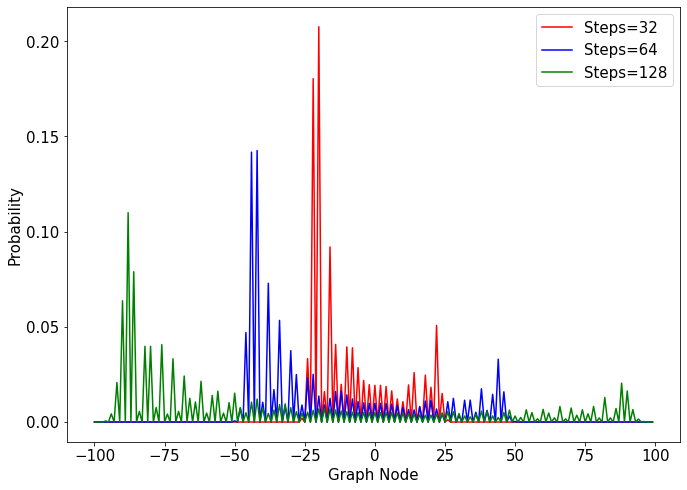

In [21]:
init1 = '1'
initcond1 = init_cond(init1,state0,state1)
N = 200
colors = ['r','b','g','k']
lines = ['-','-','-','-']
configVec = zip(colors,lines)

stepMult = [32,64,128]
multQWpsi0 = multipleCoined(N,stepMult,state0,state1,initcond1)
plotMultQW(N,multQWpsi0,init1,stepMult,configVec)

<ipython-input-6-afdc03628f3f>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  probs[x]=psiN[x]*conjugate(psiN[x]) + psiN[N+x]*conjugate(psiN[N+x]) #duvida aqui


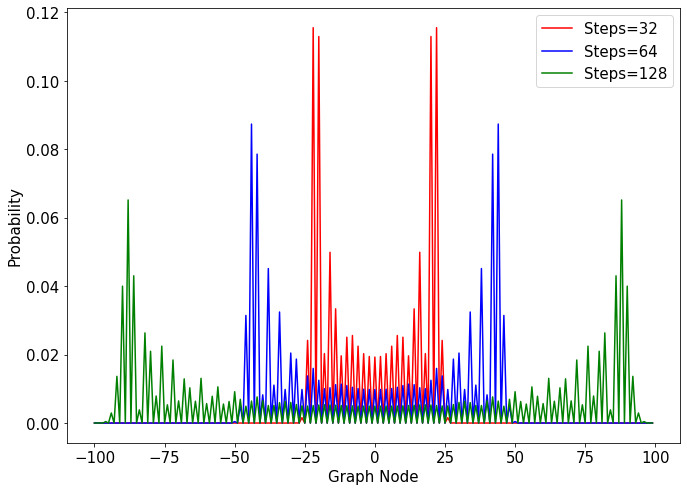

In [22]:
init1 = '01'
initcond1 = init_cond(init1,state0,state1)
N = 200
colors = ['r','b','g','k']
lines = ['-','-','-','-']
configVec = zip(colors,lines)

stepMult = [32,64,128]
multQWpsi0 = multipleCoined(N,stepMult,state0,state1,initcond1)
plotMultQW(N,multQWpsi0,init1,stepMult,configVec)

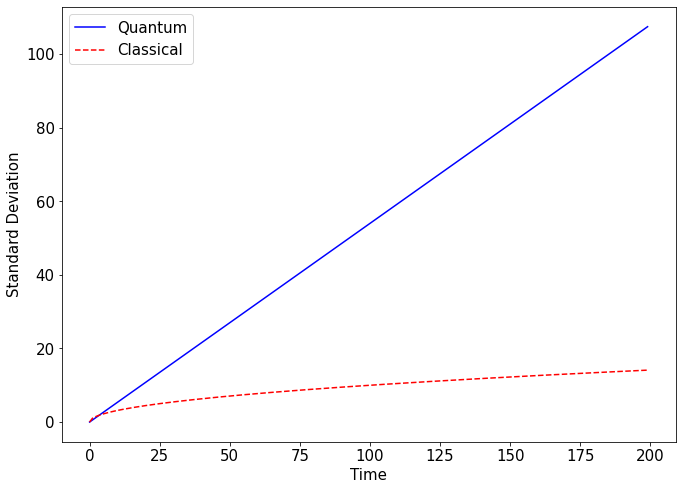

In [28]:
def standardDevClassical(t):
    devList = []
    for i in range(t):
        x = i
        y = np.sqrt(i)
        devList.append((x,y))
    return devList

def standardDevQuantum(t):
    devList = []
    for i in range(t):
        x = i
        y = 0.54*i
        devList.append((x,y))
    return devList

def plotStandardDev(devListClassical,devListQuantum):
    x,y = zip(*devListClassical)
    i,j = zip(*devListQuantum)
    plt.plot(i,j,color='b',linestyle='-',label="Quantum")
    plt.plot(x,y,color='r',linestyle='--',label="Classical")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Standard Deviation")


t=200
stdDevListClassical = standardDevClassical(t)
stdDevListQuantum = standardDevQuantum(t)
plotStandardDev(stdDevListClassical,stdDevListQuantum)